# Schätzung des Mittelwerts von gleichverteiltem Rauschen

## 1. Problemstellung

Wir messen gleichverteiltes Rauschen $y[n] = w[n]$ mit $w[n] \in [0, w_{\max}]$. Daraus ergibt sich die Wahrscheinlichkeitsdichtefunktion des Rauschens 

\begin{equation}
    p_{W[n]}(\xi) = \begin{cases} 
          \frac{1}{w_{\max}} & 0 < \xi < w_{\max} \\ 0 & 
          \text{sonst} \end{cases} 
	\qquad \text{für } 0 \leq n < N .
\end{equation}

Die Rauschwerte seien statistisch unabhängig und identisch verteilt, d.h. die Verbundwahrscheinlichkeitsdichte kann in die marginalen Dichten faktorisiert werden. Es gilt 

\begin{equation}
    p_{\mathbf{W}}(\xi_0, \ldots , \xi_{N-1}) 
    = \prod_{n=0}^{N-1} p_{W[n]}(\xi_n) 
    = \prod_{n=0}^{N-1} p_W(\xi_n) . 
\end{equation}

Die Varianz des Rauschens beträgt

\begin{align*}
    \sigma_W^2 
    &= \int \limits_{-\infty}^{\infty} (\xi - w_{\max}/2)^2 p_W(\xi) d\xi 
     = \int \limits_0^{w_{\max}} \frac{(\xi - w_{\max}/2)^2}{w_{\max}} d\xi 
     = \int \limits_{- w_{\max}/2}^{w_{\max}/2} \frac{\eta^2}{w_{\max}} d\eta 
     = \frac{2 w_{\max}^3}{8 \cdot 3 w_{\max}} 
     = \frac{w_{\max}^2}{12}
\end{align*} 

Gesucht wird der Mittelwert des Rauschens $\theta = w_{\max}/2$. 

## 2. Konventioneller Schätzer

Intuitiv können wir den ML-Schätzer für gaußverteiltes Rauschen auch bei diesem Schätzproblem einsetzen. 

\begin{equation}
    \widehat{\theta} = \frac{1}{N} \sum_{n=0}^{N-1} w[n]
\end{equation}

Dieser Schätzer ist erwartungstreu 

\begin{equation}
    \mathrm{E} \{ \hat{\theta} \}
    = \frac{1}{N} \sum_{n=0}^{N-1} \mathrm{E} \{ w[n] \} 
    =\frac{w_\max}{2}
\end{equation}

mit Varianz 

\begin{align*}
	\sigma_{\hat{\theta}}^2 
	&= \mathrm{E} \left\{ \left( \widehat{\theta} 
     - \mathrm{E} \{ \widehat{\theta} \} \right)^2 \right\}
	 = \mathrm{E} \left\{ \left( \frac{1}{N} \sum_{n=0}^{N-1} w[n] 
     - \frac{1}{N} \sum_{n=0}^{N-1} \mathrm{E} \{ w[n] \} \right)^2 \right\} \\
	&= \frac{1}{N^2} \sum_{n=0}^{N-1} \sum_{m=0}^{N-1} \mathrm{E} \{ w[n]w[m] \} 
     - \frac{w_{\max}}{N} \sum_{n=0}^{N-1} \mathrm{E} \{ w[n] \} + \frac{w_{\max}^2}{4} \\
	&= \frac{1}{N^2} \left( N^2 \frac{w_{\max}^2}{4} + N \sigma_W^2 \right) 
     - \frac{w_{\max}^2}{2} + \frac{w_{\max}^2}{4}
	 = \frac{\sigma_W^2}{N} \\
	&= \frac{w_{\max}^2}{12N}
\end{align*}

Aber ist dies auch der MVU-Schätzer?


## 3. MVU-Schätzer bei gleichverteiltem Rauschen

### 3.1 Sufficient Statistics mit Neyman-Fisher-Theorem

* Cramer-Rao-Lower-Bound nicht anwendbar, da Gleichverteilung Sprungstellen hat und nicht stetig differenzierbar ist
* Ansatz über Neyman-Fisher-Faktorisierung der Likelihood-Funktion $p_Y(\mathbf{y};\theta)$
* Wie oben beschrieben folgt aus der statistischen Unabhängigkeit der Abtastwerte $y[n]=w[n]$ 

\begin{align*}
    p_Y(\mathbf{y};\theta) 
    &= \prod_{n=0}^{N-1} p_Y(y[n])
     = \begin{cases} 
         \frac{1}{w_{\max}^N} & 0 < y[n] < w_{\max} \quad \forall n \\ 
         0 & \text{sonst} 
       \end{cases}
\end{align*}

* Wenn für jeden Abtastwert $0 < y[n] < w_{\max}$ gilt, muss das Minimum positiv und das Maximum kleiner als $w_\max$ sein. Damit kann man die Likelihood-Funktion mit der Sprungfunktion $u(x) = \begin{cases} 1 &  x>0 \\ 0 & x<0 \end{cases}$ umschreiben

\begin{align*}
    p_Y(\mathbf{y};\theta) 
    &= \begin{cases} 
           \frac{1}{w_{\max}^N} & \min_n(y[n]) > 0 \wedge \max_n(y[n]) < w_{\max} \\ 
           0 & \text{sonst} 
       \end{cases} \\
    &= \frac{1}{w_{\max}^N} \cdot u \big( w_{\max} - \max_n(y[n]) \big) \cdot u \big( \min_n(y[n]) \big)
\end{align*}

* Damit erhalten wir die Faktorisierung

\begin{align*}
	p_Y(\mathbf{y};\theta) 
	&= \underbrace{\frac{1}{w_{\max}^N} \cdot u \big( w_{\max} - \max_n(y[n]) \big)}_{=f(q(\mathbf{y}),\theta)}
	\cdot \underbrace{u \big( \min_n(y[n]) \big)}_{h(\mathbf{y})}
\end{align*}

   * Funktion $f(q(\mathbf{y}),\theta)$ hängt nur vom gesuchten Parameter $\theta=w_{\max}/2$ und der Funktion $q(\mathbf{y}) = \max_n(y[n])$ ab
   * Funktion $h(\mathbf{y})$ hängt nur von den Messwerten $\mathbf{y}$ aber nicht von $\theta$ ab
   * Nach Neyman-Fisher ist die Funktion $q(\mathbf{y})=\max_n(y[n])$ daher eine Sufficient Statistics

Gesucht ist nun ein Schätzer, der basierend auf $T=q(\mathbf{y})$ eine erwartungstreue Schätzung liefert. Dazu ist der Erwartungswert $\mathrm{E}_{Y}\{T\}$ bzgl. der Messwerte $\mathbf{y}$ zu bestimmen.


### 3.2 Erwartungstreue Schätzung mit Sufficient Statistics 

* Um den Erwartungswert des Maximums $T = max_n(y[n])$ zu berechnen, brauchen wir die Wahrscheinlichkeitsdichtefunktion $p_T(\xi)$

* Kumulative Dichte (Verteilungsfunktion) des Maximalwertes bei statistischer Unabhängigkeit der Messwerte:

\begin{align*}
    P_T(\xi) 
    &= \Pr \{ T \leq \xi \}
     = \Pr \{ Y[0] \leq \xi, Y[1] \leq  \xi , \cdots , Y[N-1] \leq \xi \} \\
    &= \prod_{n=0}^{N-1} \Pr \{ Y[n] \leq \xi \} 
     =_{\text{i.i.d.}} \Pr \{ Y[n] \leq \xi \}^N
     = P_{Y[n]}(\xi)^N
\end{align*}

* aus Gleichverteilung von $y[n]$ folgt für kumulative Dichte eines Messwertes $y[n]$

\begin{align*}
    p_{Y[n]}(\xi) &= 
    \begin{cases} 
        \frac{1}{w_{\max}} & 0 < \xi < w_{\max} \\ 0 & \text{sonst} 
    \end{cases}
    \quad \Rightarrow \quad
    P_{Y[n]}(\xi) = 
    \begin{cases} 
        0 & \xi < 0 \\ 
        \frac{\xi}{w_{\max}} & 0 < \xi < w_{\max} \\ 
        1 & \xi > w_{\max} 
    \end{cases}
\end{align*}

* Kumulative Dichte (Verteilungsfunktion) des Maximalwertes:

\begin{align*}
    P_T(\xi) 
    &= P_{Y[n]}(\xi)^N
     = \begin{cases} 
            0 & \xi < 0 \\ 
            \left( \frac{\xi}{w_{\max}} \right)^N & 0 < \xi < w_{\max} \\ 
            1 & \xi > w_{\max} 
        \end{cases}
\end{align*}

* Ableitung der kumulativen Dichte liefert Wahrscheinlichkeitsdichtefunktion des maximalen Messwertes

\begin{align*}
    p_T(\xi) 
    &= \frac{dP_T(\xi)}{d\xi}
     = N \cdot P_{Y[n]}(\xi)^{N-1} \cdot \frac{dP_{Y[n]}(\xi)}{d\xi} \\
    &= \begin{cases} 
        0 & \xi < 0 \\ 
        \frac{N}{w_{\max}} \left( \frac{\xi}{w_{\max}} \right)^{N-1} & 0 < \xi < w_{\max} \\ 
        0 & \xi > w_{\max}
        \end{cases}
\end{align*}

* Erwartungswert der Sufficient Statistics kann nun berechnet werden und liefert gesuchten Parameter $\theta$ mit Bias

\begin{align*}
    \mathrm{E} \{T\} 
    &= \int_{-\infty}^{\infty} \xi \cdot p_T(\xi) \ d\xi 
     = \int_0^{w_{\max}} \xi \cdot \left( \frac{\xi}{w_{\max}} \right)^{N-1} \frac{N}{w_{\max}} d\xi \\
    &= \frac{N}{w_{\max}^N} \int_0^{w_{\max}} \xi^N d\xi 
     = \frac{N}{N+1} w_{\max}
     = \frac{2N}{N+1} \theta
\end{align*}

* Varianz der Sufficient Statistics

\begin{align*}
    \sigma_T^2
    &= \mathrm{E} \left\{ \left( T - \mathrm{E}\{T\} \right)^2 \right\}
     = \mathrm{E} \left\{ T^2 \right\} - \mathrm{E}\{T\}^2 \\
    &= \int_0^{w_{\max}} \xi^2 N \left( \frac{\xi}{w_{\max}} \right)^{N-1} \frac{1}{w_{\max}} d\xi
     - \left( \frac{2N}{N+1} \frac{w_{\max}}{2} \right)^2 \\
    &= \frac{N}{w_{\max}^N} \cdot \int_0^{w_{\max}} \xi^{N+1} d\xi
     - \left( \frac{2N}{N+1} \frac{w_{\max}}{2} \right)^2 \\
    &= \frac{N w_{\max}^{N+2}}{w_{\max}^N (N+2)} - \left( \frac{2N}{N+1} \frac{w_{\max}}{2} \right)^2 
     = \frac{N (N+1)^2 - N^2 (N+2)}{(N+2)(N+1)^2} \cdot  w_{\max}^2 \\
    &= \frac{N}{(N+2)(N+1)^2} \cdot w_{\max}^2
\end{align*}

* Erwartungstreuer Schätzer	kompensiert den Bias
\begin{align*}
	\widehat{\theta} &= \frac{N+1}{2N} \cdot \max_n \big( y[n] \big)
\end{align*}


* Damit ergibt sich die Varianz der erwartungstreuen Schätzung 

\begin{align*}
    \sigma_{\hat{\theta}}^2 
    &= \left( \frac{N+1}{2N} \right)^2 \cdot \sigma_T^2 
     = \left( \frac{N+1}{2N} \right)^2 \cdot \frac{N w_{\max}^2}{(N+2)(N+1)^2} 
     = \frac{w_{\max}^2}{4N(N+2)}
     {\color{red} \leq \frac{w_{\max}^2}{12N}}
\end{align*}

* Die Schätzvarianz ist für $N>1$ kleiner als für den intuitiven Schätzer $\frac{1}{N} \sum_{n=0}^{N-1} y[n]$
* Der MVU-Schätzer für die Mittelwertschätzung von gleichverteiltem Rauschen ist ein nichtlinearer Schätzer!

Anschauliche Interpretation:
Für viele Messwerte $N \gg 1$ strebt der Faktor vor dem Maximum gegen den Wert $\frac{1}{2}$. In diesem Fall ist es sehr wahrscheinlich, dass der größte gemessene Wert dicht am theoretischen Maximum $w_\max$ liegt. Die Hälfte dieses Maximums ist dann der gesuchte Mittelwert. Dass hiermit die Schätzvarianz minimiert wird, ist allerdings nicht offensichtlich.

## 4. Numerische Beispiele

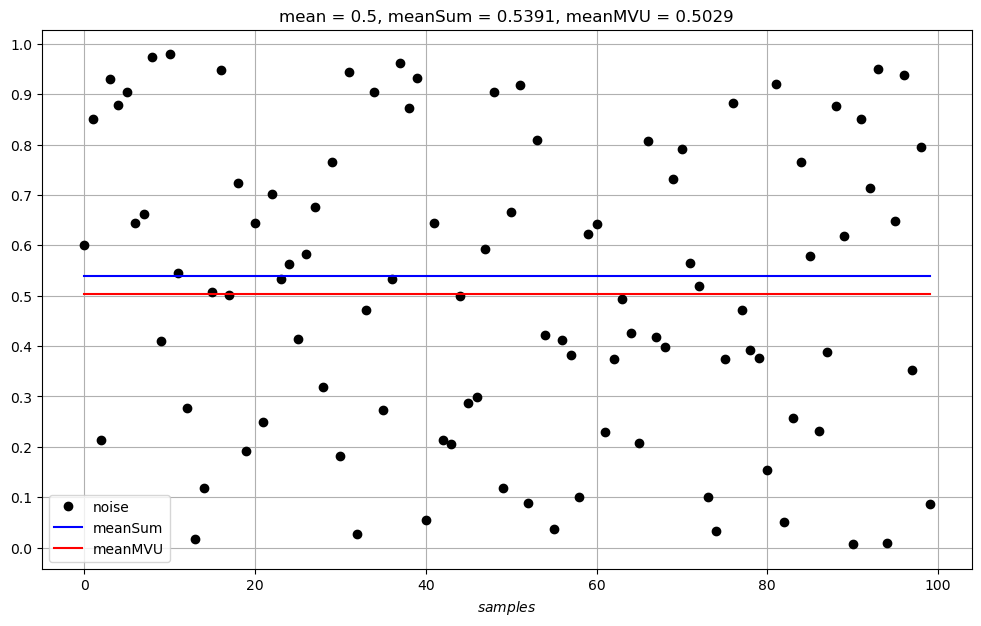

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# number of repetitions
Nrepetitions = 100

# number of measurements
Nsamples = np.arange(5,101,5)

# maximum amplitude
wmax = 1.0

meanConventional = np.zeros((len(Nsamples),Nrepetitions))
meanMVU = np.zeros((len(Nsamples),Nrepetitions))

cntr = 0
for n in Nsamples:
    # generate noise samples
    noise = np.random.random_sample((Nrepetitions,n)) * wmax
    
    # estimate mean with conventional approach
    meanConventional[cntr,:] = np.mean(noise,axis=1)

    # estimate mean with MVU approach
    meanMVU[cntr,:] = (n+1)/(2*n)*np.amax(noise,axis=1)

    cntr +=1

var_meanConventional = np.sum((meanConventional-wmax/2)**2,axis=1) / Nrepetitions
var_meanMVU = np.sum((meanMVU-wmax/2)**2,axis=1) / Nrepetitions


fig_samples = plt.figure(figsize=(12,7))
ax1 = fig_samples.add_subplot(111)
ax1.plot(np.arange(Nsamples[-1]), noise[0,:], 'ko',label='noise')
ax1.plot(np.arange(Nsamples[-1]), meanConventional[-1,-1]*np.ones(Nsamples[-1]), 'b-',label='meanSum')
ax1.plot(np.arange(Nsamples[-1]), meanMVU[-1,-1]*np.ones(Nsamples[-1]), 'r-',label='meanMVU')
plt.xlabel('$samples$')
#plt.ylabel('CRLB')
plt.title('mean = 0.5, meanSum = ' + "{:.4f}".format(meanConventional[-1,-1]) + ', meanMVU = ' + "{:.4f}".format(meanMVU[-1,-1]))
plt.grid(True)
plt.yticks(np.arange(0,1.1,0.1))
plt.legend()
plt.show()

Im obigen Bild sind die zufälligen Messwerte als schwarze Punkte und die Ergebnisse der konventionellen Mittelwertschätzung (blau) sowie der MVU-Schätzung (rot) angegeben. Man erkennt, dass die MVU-Schätzung dichter am theoretischen Mittelwert $\frac{1}{2}$ liegt.

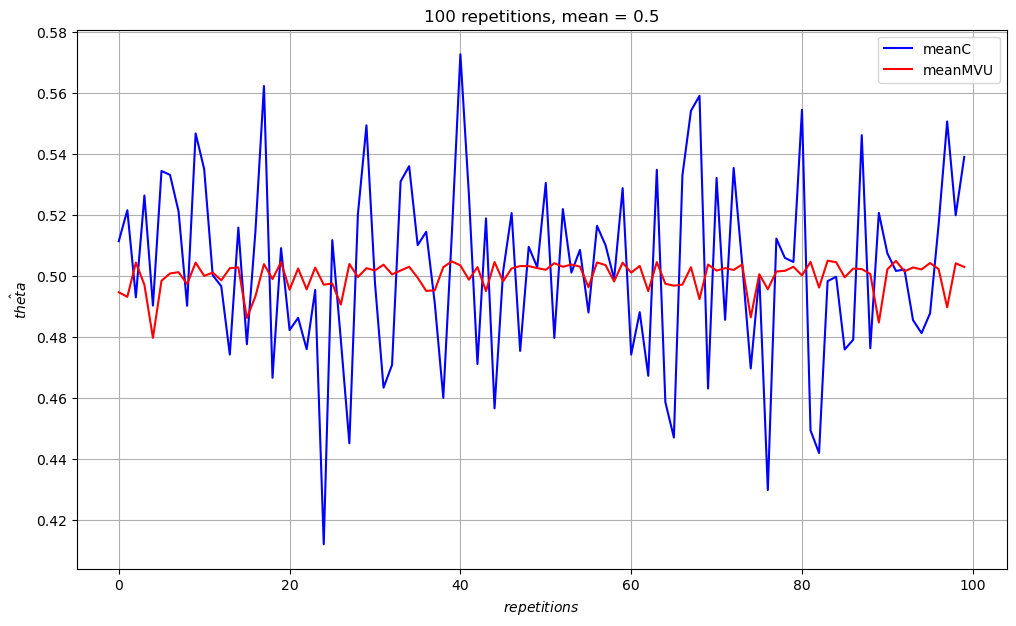

In [13]:
fig_means = plt.figure(figsize=(12,7))
ax1 = fig_means.add_subplot(111)
ax1.plot(np.arange(Nrepetitions), meanConventional[-1,:], 'b-',label='meanC')
ax1.plot(np.arange(Nrepetitions), meanMVU[-1,:], 'r-',label='meanMVU')
plt.xlabel('$repetitions$')
plt.ylabel('$\hat{theta}$')
plt.title(str(Nsamples[-1]) + ' repetitions, mean = 0.5')
plt.grid(True)
plt.legend()
plt.show()


Im obigen Bild sind die Schätzergebnisse für 100 Wiederholungen angegeben, wobei 100 Messwerte je Schätzung verwendet wurden. Offensichtlich führt die konventionelle Mittelwertschätzung zu deutlich größeren Abweichungen vom tatsächlichen Mittelwert als die MVU-Schätzung. 

Das untere Bild zeigt die zugehörigen Schätzvarianzen. Sie bestätigen die gemachte Beobachtung. Für beide Schätzer sinken die Varianzen mit zunehmender Anzahl an Messwerten. Allerdings fällt die Varianz beim MVU-Schätzer sehr schnell auf nahezu Null ab, während in dem dargestellten Bereich beim konventionellen Schätzer eine deutliche Lücke bleibt. Die ermittelten Schätzvarianzen stimmen sehr gut mit den theoretisch berechneten Varianzen (gestrichtelte Linien) überein.

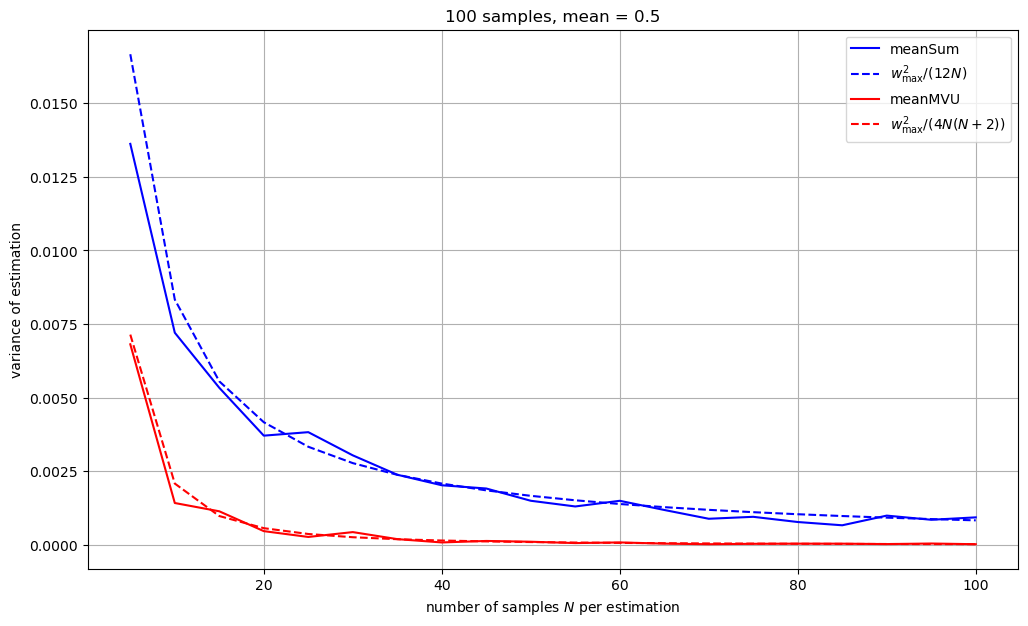

In [14]:
fig_var = plt.figure(figsize=(12,7))
ax1 = fig_var.add_subplot(111)
ax1.plot(Nsamples, var_meanConventional, 'b-',label='meanSum')
ax1.plot(Nsamples, 1/(12*Nsamples), 'b--',label='$w_{\max}^2/(12N)$')
ax1.plot(Nsamples, var_meanMVU, 'r-',label='meanMVU')
ax1.plot(Nsamples, 1/(4*Nsamples*(Nsamples+2)), 'r--',label='$w_{\max}^2/(4N(N+2))$')
plt.xlabel('number of samples $N$ per estimation')
plt.ylabel('variance of estimation')
plt.title(str(Nsamples[-1]) + ' samples, mean = 0.5')
plt.grid(True)
plt.legend()
plt.show()
